# Trabalho 1 - Parte I - Projeto de Análise de Dados

## Componentes

- Raphael Ramos
- Victor Gabriel

## Dataset escolhido

*Air Quality Data in India (2015 - 2020)*. Disponível em: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india/data

## Explicação do dataset

O dataset em questão contém informações sobre a qualidade do ar e o AQI (Índice de Qualidade do Ar) em nível horário e diário de várias estações em diversas cidades da Índia. Os CSV presentes neste dataset sáo

Esse dataset possui cinco conjunto de dados em CSV, sendo eles:

- city_day.csv e city_hour.csv possuem dados sobre as concentrações de poluentes em dia e em hora, respectivamente, em cada cidade da Índia
- station_day.csv e station_hour.csv possuem os mesmos dados do item anterior, mas para estações de cada cidade da Índia, identificadas por códigos
- stations.csv associa os códigos das estações às cidades da Índia, e a descreve

Para este trabalho, nos concentraremos apenas nos conjuntos de dados city_day.csv, station_day.csv e stations.csv

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt

from utils.charts import plot_bar

data_path = '../data'

### Concentrações de poluentes diária por cidade

| Nome da coluna | Descrição                                                                 | Tipo de dado      |
|----------------|---------------------------------------------------------------------------|-------------------|
| City           | Nome da cidade onde os dados foram coletados                              | Texto             |
| Date           | Data da coleta dos dados                                                  | Data              |
| PM2.5          | Concentração de partículas finas com diâmetro ≤ 2.5 micrômetros (μg/m³)   | Numérico (float)  |
| PM10           | Concentração de partículas com diâmetro ≤ 10 micrômetros (μg/m³)          | Numérico (float)  |
| NO             | Concentração de monóxido de nitrogênio (μg/m³)                            | Numérico (float)  |
| NO2            | Concentração de dióxido de nitrogênio (μg/m³)                             | Numérico (float)  |
| NOx            | Concentração de óxidos de nitrogênio totais (μg/m³)                       | Numérico (float)  |
| NH3            | Concentração de amônia (μg/m³)                                            | Numérico (float)  |
| CO             | Concentração de monóxido de carbono (mg/m³)                               | Numérico (float)  |
| SO2            | Concentração de dióxido de enxofre (μg/m³)                                | Numérico (float)  |
| O3             | Concentração de ozônio (μg/m³)                                            | Numérico (float)  |
| Benzene        | Concentração de benzeno (μg/m³)                                           | Numérico (float)  |
| Toluene        | Concentração de tolueno (μg/m³)                                           | Numérico (float)  |
| Xylene         | Concentração de xileno (μg/m³)                                            | Numérico (float)  |
| AQI            | Índice de Qualidade do Ar (calculado com base nos poluentes medidos)     | Numérico (float)  |
| AQI_Bucket     | Categoria qualitativa do AQI (ex: Good, Satisfactory, Poor, etc.)         | Texto             |



In [2]:
df_city_day = pd.read_csv('{}/city_day.csv'.format(data_path))
df_city_day.info()
df_city_day.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Concentrações de poluentes diária por estação

Possui os mesmos dados da tabela anterior, mas o invés da coluna City, temos StationId (tipo Texto), que apresenta o identificador/código da estação em questão

In [3]:
df_station_day = pd.read_csv('{}/station_day.csv'.format(data_path))
df_station_day.info()
df_station_day.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


### Código das estações

| Nome da coluna | Descrição                                                             | Tipo de dado     |
|----------------|-----------------------------------------------------------------------|------------------|
| StationId      | Identificador único da estação de monitoramento                      | Texto            |
| StationName    | Nome completo da estação de monitoramento                             | Texto            |
| City           | Cidade onde a estação está localizada                                 | Texto            |
| State          | Estado onde a estação está localizada                                 | Texto            |
| Status         | Situação atual da estação (por exemplo, ativa ou inativa)             | Texto            |


In [4]:
df_stations = pd.read_csv('{}/stations.csv'.format(data_path))
df_stations.info()
df_stations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


## Investigação de dados faltantes

Algumas cidades/estações não possuem dados em determinadas datas, o que torna a série temporal descontínua

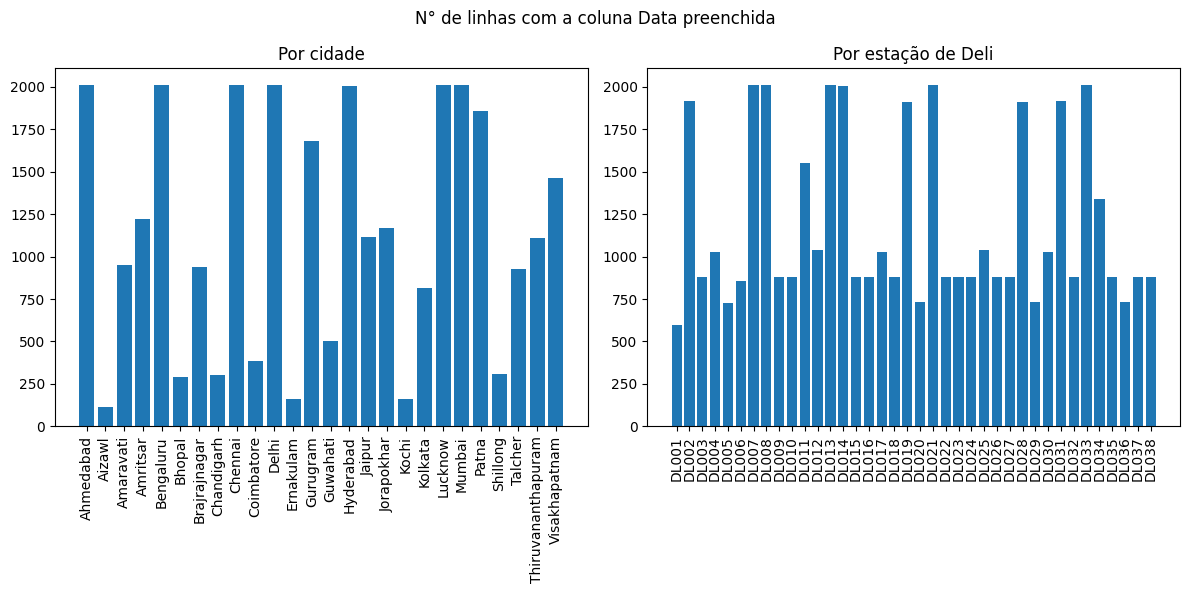

In [5]:
df_city_day_count = df_city_day.groupby('City')['Date'].count()

df_station_day_dl = df_station_day[df_station_day['StationId'].str.contains('DL')]
df_station_count_dl = df_station_day_dl\
    .groupby('StationId')['Date']\
    .count()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle("N° de linhas com a coluna Data preenchida")

plot_bar(ax[0], df_city_day_count, f"Por cidade")
plot_bar(ax[1], df_station_count_dl, f"Por estação de Deli")

plt.tight_layout()
plt.show()

Há linhas em que não foram registradas concentrações para um ou mais poluentes

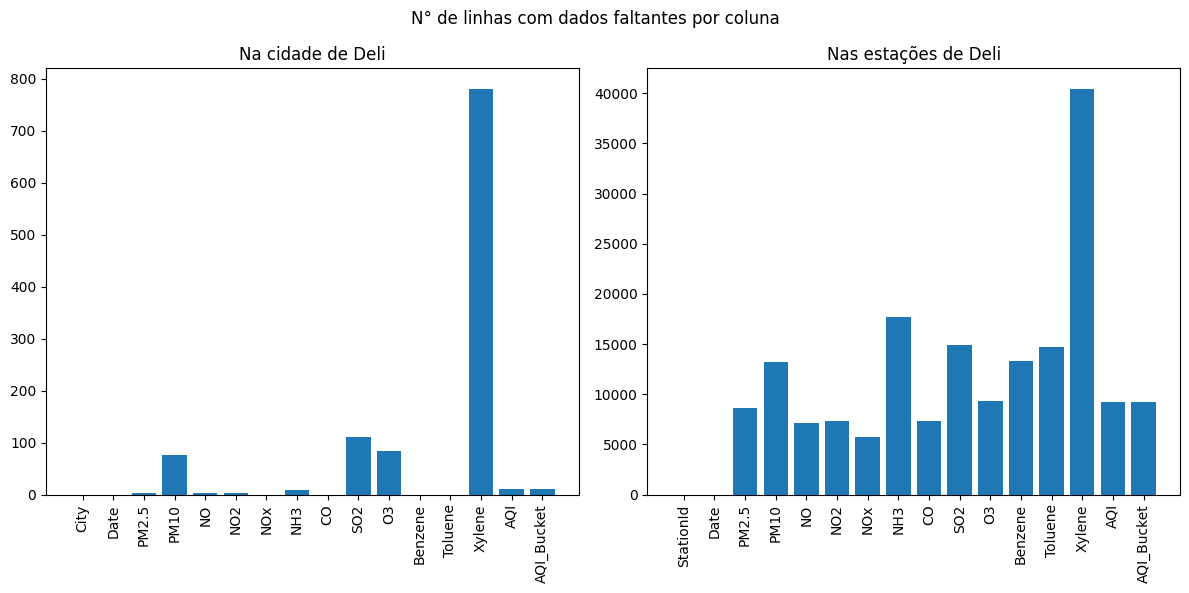

In [6]:
df_city_day_dl = df_city_day[df_city_day['City'] == 'Delhi']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle("N° de linhas com dados faltantes por coluna")

plot_bar(ax[0], df_city_day_dl.isnull().sum(), "Na cidade de Deli")
plot_bar(ax[1], df_station_day_dl.isnull().sum(), "Nas estações de Deli")

plt.tight_layout()
plt.show()

## Análises pretendidas

- Usar uma série temporal para analisar como o AQI da cidade de Delhi evoluiu de 2015 a 2020
- Verificar a correlação entre o AQI e os poluentes na cidade e estações de Delhi
- Obter um score de AQI para cada estado da India conhecido neste dataset (realizar um join com a coluna state do arquivo stations.csv)

## Pré-processamento
- Escolher uma estratégia para preencher as concentrações de poluentes faltantes nas análises que envolvem periodo
- Identificar outliers de cada poluente e desconsiderá-los ao fazer o cálculo do score de AQI